In [3]:
import gymnasium as gym
import mo_gymnasium as mo_gym
import numpy as np
from src import MO_DQN
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd

In [4]:
env = mo_gym.make('circle-env-v0', render_mode='rgb_array')
env.unwrapped.configure({
    "screen_width": 500,
    "screen_height": 500,
    "observation": {
        "type": "MultiAgentObservation",
        "observation_config": {
            "type": "Kinematics",
        }
    }
})
env.unwrapped.configure({
    "manual_control": True
})

obs, info = env.reset()

agent = MO_DQN.MO_DQN(env, num_objectives=1, seed=11, observation_space_shape=obs[0].shape, epsilon=0.1, replay_buffer_size=1000, batch_ratio=0.1)
df = agent.train(200_000, target_update_frequency=10)
print(df)
df.to_csv("data/test_rewards.csv")

Iterations:   0%|          | 145/200000 [00:02<58:13, 57.21it/s]


KeyboardInterrupt: 

In [3]:
df = pd.read_csv("data/test_rewards.csv")
df["episode"] = df["episode"]+1
display(df)

,Unnamed: 0,episode,accumulated_reward
0,0,1,-0.80
1,1,2,15.20
2,2,3,15.35
3,3,4,5.05
4,4,5,25.15
...,...,...,...
2206,2206,2207,18.45
2207,2207,2208,7.90
2208,2208,2209,8.90
2209,2209,2210,18.75


,Unnamed: 0,episode,accumulated_reward,moving_average
0,0,1,-0.80,-0.800000
1,1,2,15.20,7.200000
2,2,3,15.35,9.916667
3,3,4,5.05,8.700000
4,4,5,25.15,11.990000
...,...,...,...,...
2206,2206,2207,18.45,11.292546
2207,2207,2208,7.90,11.291010
2208,2208,2209,8.90,11.289928
2209,2209,2210,18.75,11.293303


<Axes: xlabel='episode'>

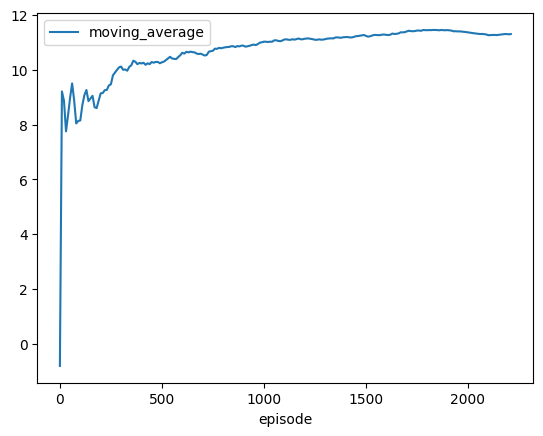

In [9]:
df["moving_average"] = df["accumulated_reward"].cumsum()/(df["episode"])
display(df)
df.iloc[::10].plot.line(x="episode", y="moving_average")